# <font color='red'> What is your favourite data science or machine learning algorithm or method?</font>
# <center>Principal Component Analysis </center>


# Principal Component Analysis (PCA)

* PCA was invented in 1901 by Karl Pearson 


* PCA is mostly used as a tool in exploratory data analysis 


* Dimentionality reduction method:  extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.


# Genes mirror geography within Europe
Novembre, John & Johnson, Toby & Bryc, Katarzyna & Kutalik, Zoltan & R Boyko, Adam & Auton, Adam & Indap, Amit & King, Karen & Bergmann, Sven & Nelson, Matthew & Stephens, Matthew & Bustamante, Carlos. (2008). Genes Mirror Geography within Europe. Nature. 456. 274. 10.1038/nature07566. 

<img src="EuropePCAGenes.png" width="600" height="600" />





![alt text](Principal_Component_Analysis_print.png "PCA")
from https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_with_pca/

# PCA algorithm: Linear algebra at its best!

• **Given data {x1,x2...,xm} , compute the covariance matrix**

<img src="PCA_math1.png" width="400" height="400" />

• **Find the eigenvalues and eigenvectors that diagonalize the covariance matrix**
   + Eigenvectors are the PCA basis vectors (orthogonal)
   + Larger eigenvalue -> more important eigenvector  

• **Rotate data**
   + Multiply the original data by the eigenvectors to re-orient our data onto the PCA basis.


# <font color='red'> Prepare a presentation, with an example dataset of your choice, showing this method being applied.</font>
## <center> Dataset: Under-five mortality rate (per 1,000 live births) from Gapminder. Yearly data from 1800 to 2015.

The following analysis combines two different unsupervised methods such as PCA and Agglomerate Clustering to find hidden relationships in the dataset.

* The PCA analysis reduces the dimentionality of the data (which is represented by the yearly data features) by finding the principal components that carry most of the variance, it simplifies the complexity in high-dimensional data while retaining trends and patterns.

* A clustering algorithm groups toguether the countries that share similar trends in their time series data. Projecting the different clusters on the principal component space allows a better understanding of what these clusters represent.

The Under-five mortality rate (U5M) indicator is found to be related with a country's income. Based on this, this study will link the GDP per capita data in 2015 (also obtained from Gapminder) with the clusters assinged to each country. 

# Analysis on the Under-five mortality rate (per 1,000 live births) from Gapminder

In [1]:
#Loading the under 5 child mortality data into a pandas dataframe
import pandas as pd  
file_path = 'data/gapminder_under5mortality_clean.csv'
child_mortality_df = pd.read_csv(file_path, index_col = 0)
child_mortality_df.index.names = ['country']
print 'years' ,child_mortality_df.shape[1], ', countries',child_mortality_df.shape[0]
child_mortality_df.head()

years 216 , countries 184


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.5,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,11.8,11.3,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1


# VISUALISE THE TIME SERIES DATA FOR SOME COUNTRIES

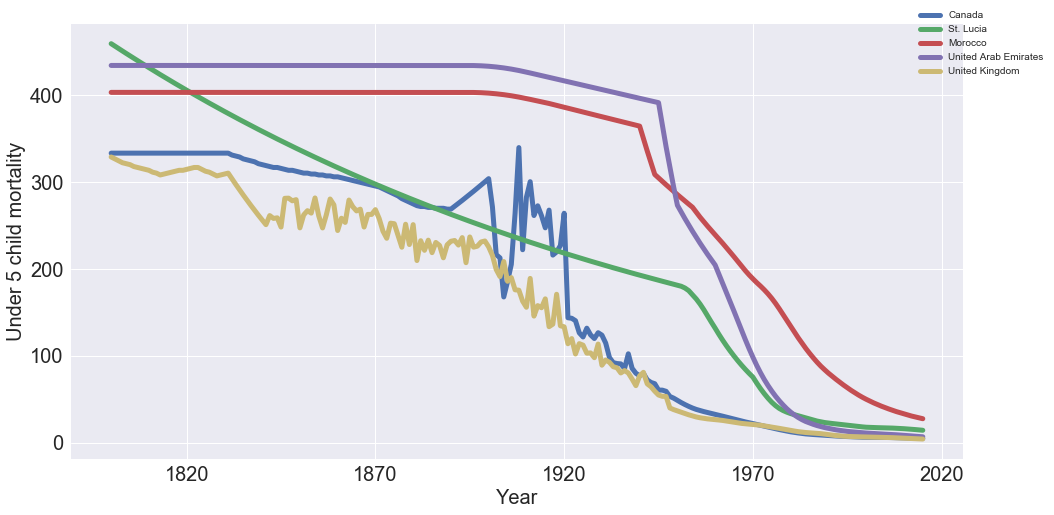

In [2]:
import data_visualisation_functions as plot
import matplotlib.pyplot as plt  

%matplotlib inline

plot.plot_timeseries_df(child_mortality_df.sample(n=5))

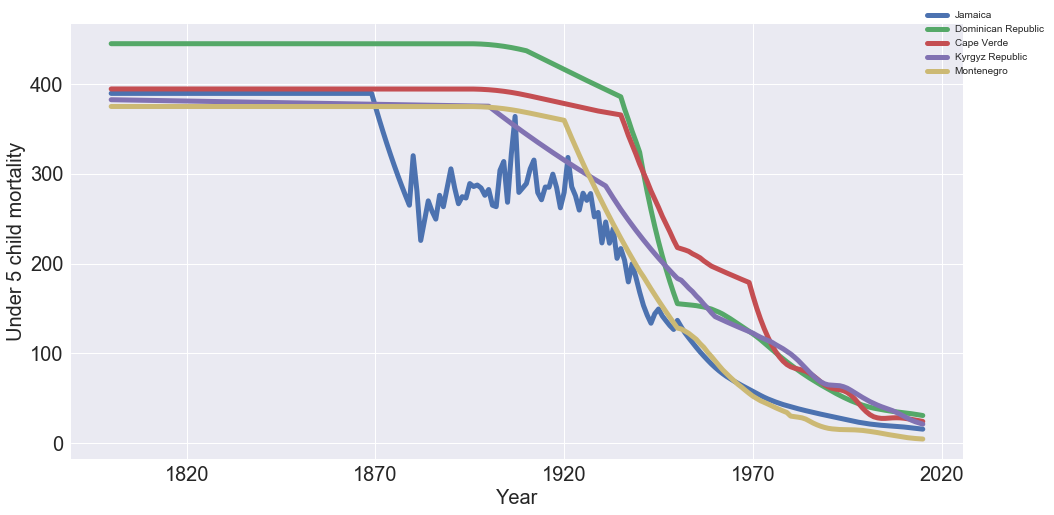

In [3]:
plot.plot_timeseries_df(child_mortality_df.sample(n=5))


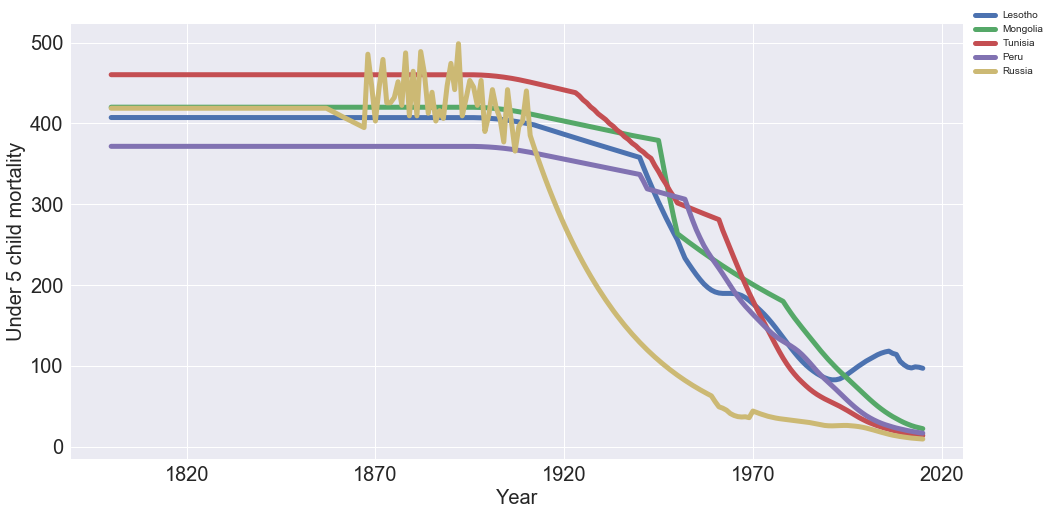

In [4]:
plot.plot_timeseries_df(child_mortality_df.sample(n=5))


# Principal Component Analysis on the time series data
By perfoming a dimensionality reduction with PCA it is possible to reduce those 215 variables to just a few.

### Scaling the data

In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(child_mortality_df)
scaled_child_mortality_df = pd.DataFrame(scaled_df, columns =child_mortality_df.columns, index =child_mortality_df.index)
scaled_child_mortality_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.670427,0.670427,0.720965,0.728932,0.732634,0.738263,0.695571,0.731171,0.686761,0.707986,...,0.573887,0.570248,0.568938,0.568723,0.497093,0.571429,0.572604,0.573592,0.573658,0.575484
Albania,0.242157,0.242157,0.358366,0.376688,0.385199,0.398142,0.286066,0.369554,0.265404,0.315181,...,0.084008,0.082128,0.080296,0.080087,0.068798,0.078286,0.078777,0.078134,0.077403,0.078065
Algeria,0.632040,0.632040,0.688463,0.697359,0.701492,0.707776,0.653359,0.693895,0.643327,0.667496,...,0.147773,0.144112,0.141574,0.140152,0.121124,0.138857,0.139330,0.140521,0.141074,0.142581
Angola,0.748853,0.748853,0.787365,0.793436,0.796257,0.800546,0.763405,0.791072,0.756557,0.773053,...,1.000000,1.000000,1.000000,1.000000,0.872578,1.000000,1.000000,1.000000,1.000000,1.000000
Antigua and Barbuda,0.693451,0.675885,0.710830,0.704866,0.695018,0.687926,0.613912,0.645135,0.570463,0.584691,...,0.045040,0.043905,0.043317,0.042749,0.036337,0.041143,0.041152,0.040581,0.039950,0.040000


# Implementing PCA
Once the data is properly scaled, it is time to obtain the principal components that contain most of the variance in the data. The sklearn library is used to estimate 4 principal components, that should contain 95% of the variance.

In [6]:
from  sklearn.decomposition  import PCA
# define the number of components and fit into the data
pca = PCA(n_components=4)
pca.fit(scaled_child_mortality_df)
#transform
child_mortality_4D = pca.transform(scaled_child_mortality_df)
#print the variance in each component
print "Variance in each component:" , pca.explained_variance_ratio_
print "Sum of variances:", round(sum(pca.explained_variance_ratio_),2)

Variance in each component: [0.7156319  0.15235747 0.04932878 0.03089097]
Sum of variances: 0.95


In [7]:
# Convert the transformed 'child_mortality_4D' data from a numPy array to a dataframe.
child_mortality_PC_df = pd.DataFrame(child_mortality_4D, columns =['PC1','PC2','PC3','PC4'] , index = scaled_child_mortality_df.index)
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,4.201598,-0.840509,0.138748,-0.249803
Albania,-1.033939,0.038476,-0.941046,0.135291
Algeria,1.897379,0.883544,-0.240806,-0.632908
Angola,4.778313,-1.417156,0.963779,0.726820
Antigua and Barbuda,-3.074463,-0.578720,0.987558,-1.009795


# Visualising the data on the PC plane
The first two components carry aprox 87% of the variance. 

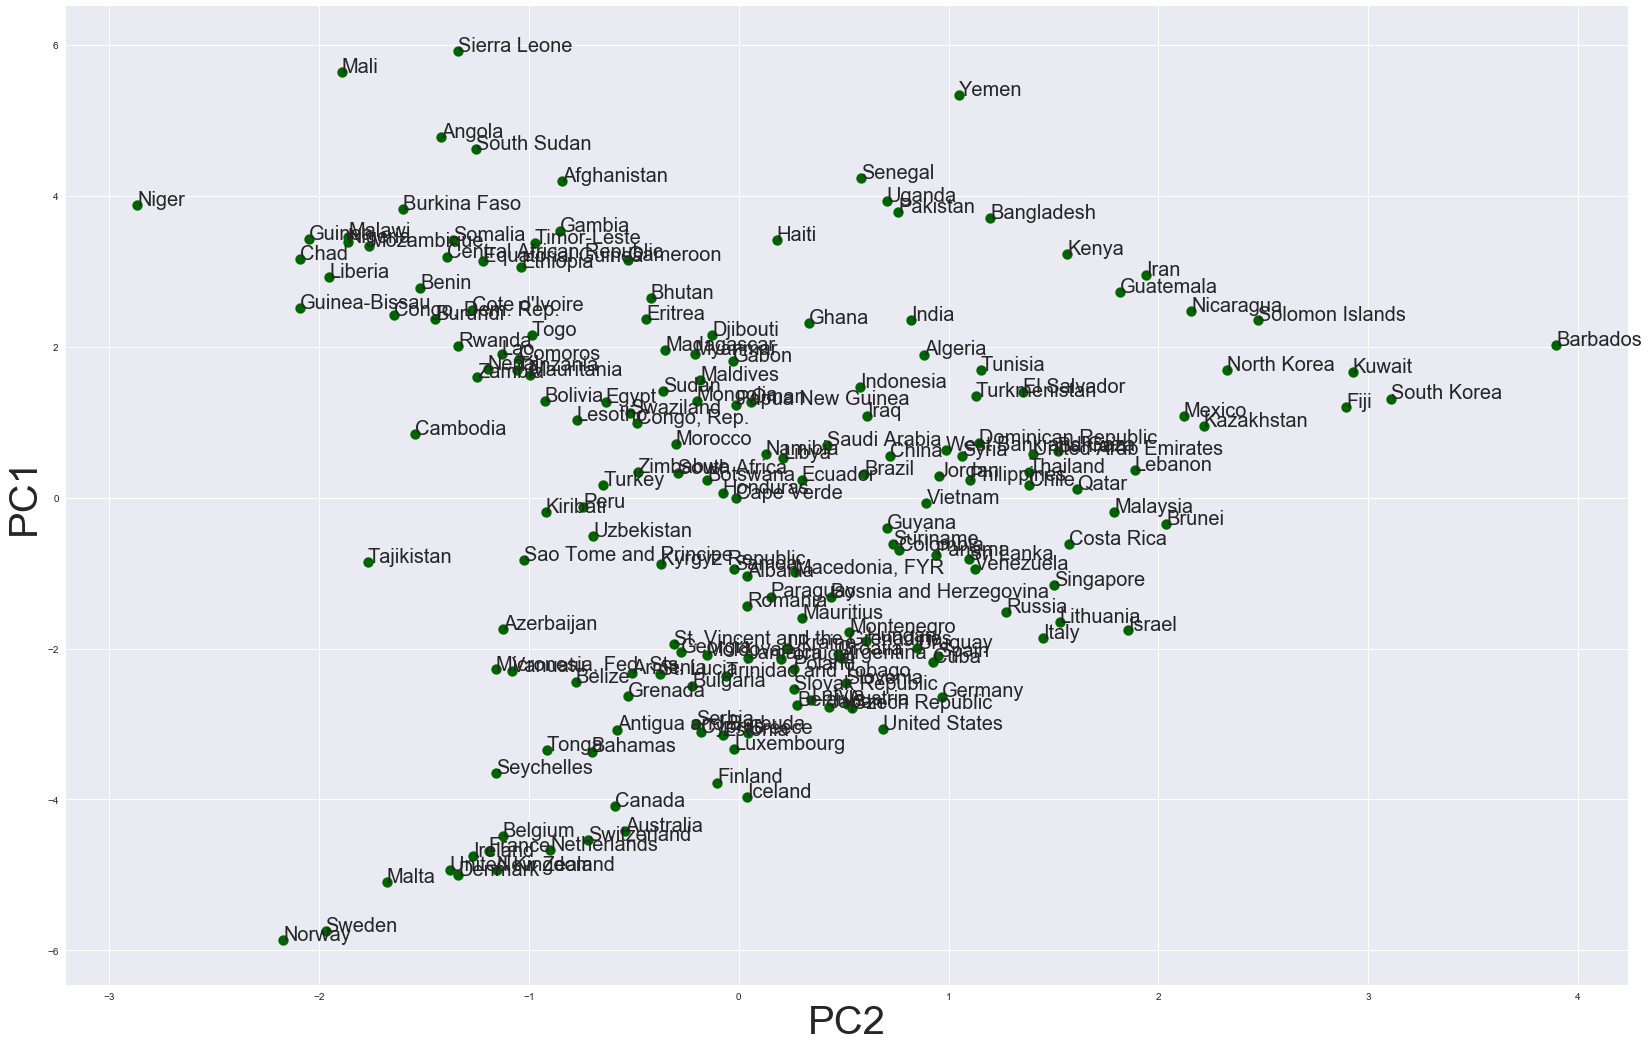

In [8]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(28,18),color='DarkGreen',s = 100);ax.set_xlabel('PC2', fontsize=40); ax.set_ylabel('PC1',fontsize=40)
for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1),fontsize=20)

# Computing new descriptive metrics

Based on the PCA and features observed in the data the following metrics are computed:
* The country average value across the time series
* The slope on the change of the U5M metric on the 20th century (before that the metric was stable for most countries).

All these metrics are computed from the data and standarised in order to have all in the same comparable scale.

## U5M average value per country across the time series:

In [9]:
#compute the country average value from the scaled dataset, add it to the PC dataframe
child_mortality_PC_df['country_mean_scaled'] = pd.Series(scaled_child_mortality_df.mean(axis=1), index=scaled_child_mortality_df.index)

## The slope on the change of the U5M metric on the 20th century


In [10]:
#compute the slope on the change of the U5M metric per country, scale it and add it to the PC dataframe
child_mortality_PC_df['country_change_slope'] = pd.Series((child_mortality_df['1900']-child_mortality_df['2000'])/float(2000-1900), index=child_mortality_df.index)
country_change_max = child_mortality_PC_df['country_change_slope'].max()
country_change_min = child_mortality_PC_df['country_change_slope'].min()
country_change_scaled = (child_mortality_PC_df.country_change_slope - country_change_min) / country_change_max
child_mortality_PC_df['country_change_slope_scaled'] = pd.Series(country_change_scaled, index=child_mortality_df.index)

In [11]:
child_mortality_PC_df[['PC1','PC2','PC3','PC4','country_mean_scaled',
                                        'country_change_slope_scaled']].head()

,PC1,PC2,PC3,PC4,country_mean_scaled,country_change_slope_scaled
country,,,,,,
Afghanistan,4.201598,-0.840509,0.138748,-0.249803,0.735693,0.379062
Albania,-1.033939,0.038476,-0.941046,0.135291,0.385736,0.384311
Algeria,1.897379,0.883544,-0.240806,-0.632908,0.590964,0.493776
Angola,4.778313,-1.417156,0.963779,0.726820,0.780208,0.261124
Antigua and Barbuda,-3.074463,-0.578720,0.987558,-1.009795,0.255192,0.148850


# Visualise these new features in the 2D PC plane

Revisit the 2D figures of the countries in the PC1-PC2 plane, weighted by their value in these variables. 

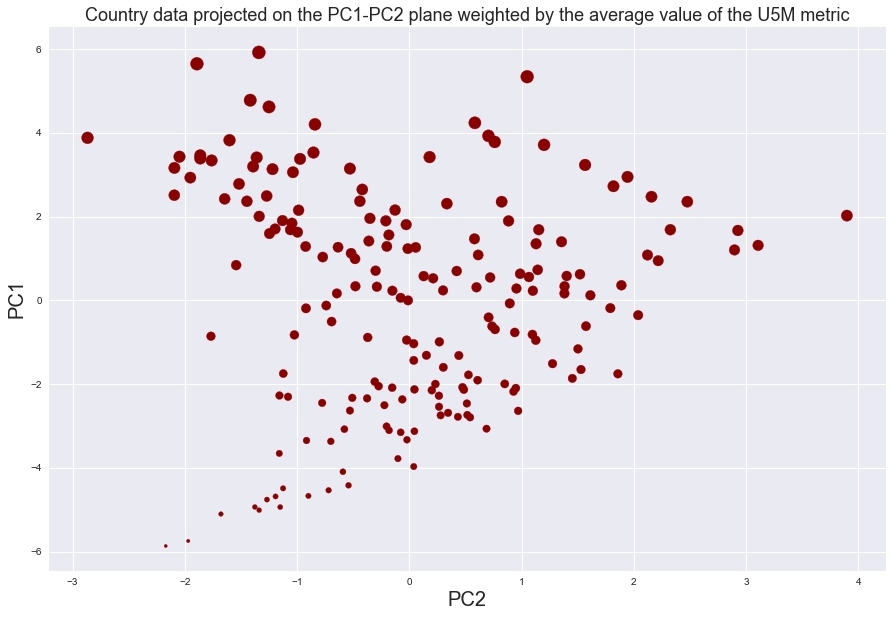

In [12]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', s=child_mortality_PC_df['country_mean_scaled']*200, figsize=(15,10),color='DarkRed')
ax.set_xlabel('PC2', fontsize=20); ax.set_ylabel('PC1',fontsize=20)
ax.set_title('Country data projected on the PC1-PC2 plane weighted by the average value of the U5M metric', fontsize=18); plt.show()

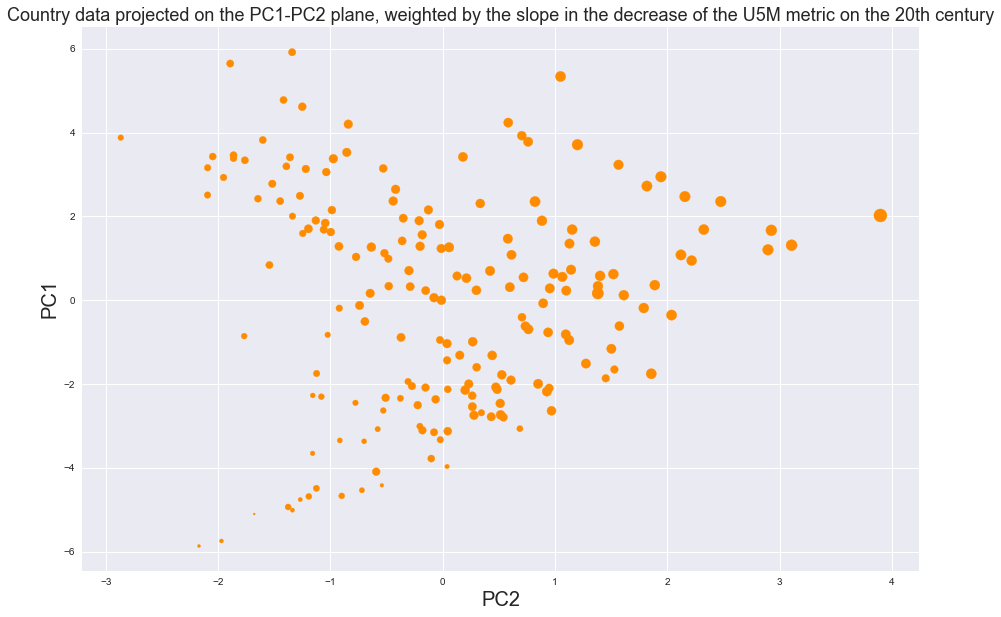

In [13]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', s=child_mortality_PC_df['country_change_slope_scaled']*200, figsize=(15,10),color='DarkOrange')
ax.set_xlabel('PC2', fontsize=20);ax.set_ylabel('PC1',fontsize=20); 
ax.set_title('Country data projected on the PC1-PC2 plane, weighted by the slope in the decrease of the U5M metric on the 20th century', fontsize=18);plt.show();

## Correlation between the principal components and new features

In [14]:
child_mortality_PC_df[['PC1','PC2','PC3','PC4','country_mean_scaled','country_change_slope_scaled']].corr()

,PC1,PC2,PC3,PC4,country_mean_scaled,country_change_slope_scaled
PC1,1.000000e+00,1.212098e-14,-2.567499e-16,-5.032428e-16,0.997571,0.429114
PC2,1.212098e-14,1.000000e+00,1.169734e-14,-5.921147e-16,0.058013,0.811194
PC3,-2.567499e-16,1.169734e-14,1.000000e+00,4.318568e-16,0.033977,-0.287941
PC4,-5.032428e-16,-5.921147e-16,4.318568e-16,1.000000e+00,0.017042,0.073795
country_mean_scaled,9.975713e-01,5.801282e-02,3.397737e-02,1.704233e-02,1.000000,0.467564
country_change_slope_scaled,4.291137e-01,8.111936e-01,-2.879411e-01,7.379450e-02,0.467564,1.000000


![alt text](AgglomerativeClustering.png "Clustering")

from https://chrisalbon.com/machine_learning/clustering/agglomerative_clustering/

# Using Agglomerative clustering to explore structure in the data


In [15]:
from sklearn.cluster import AgglomerativeClustering

# Define and fit clusters
clusters = AgglomerativeClustering(linkage='complete', n_clusters=4)
clusters.fit(scaled_child_mortality_df)
child_mortality_PC_df.insert(0, 'cluster', pd.Series(clusters.labels_, index=child_mortality_PC_df.index))
child_mortality_PC_df.head()

,cluster,PC1,PC2,PC3,PC4,country_mean_scaled,country_change_slope,country_change_slope_scaled
country,,,,,,,,
Afghanistan,3,4.201598,-0.840509,0.138748,-0.249803,0.735693,3.4477,0.379062
Albania,1,-1.033939,0.038476,-0.941046,0.135291,0.385736,3.4819,0.384311
Algeria,0,1.897379,0.883544,-0.240806,-0.632908,0.590964,4.1951,0.493776
Angola,3,4.778313,-1.417156,0.963779,0.726820,0.780208,2.6793,0.261124
Antigua and Barbuda,2,-3.074463,-0.578720,0.987558,-1.009795,0.255192,1.9478,0.148850


## Visualising the clusters on the 2D principal component plane


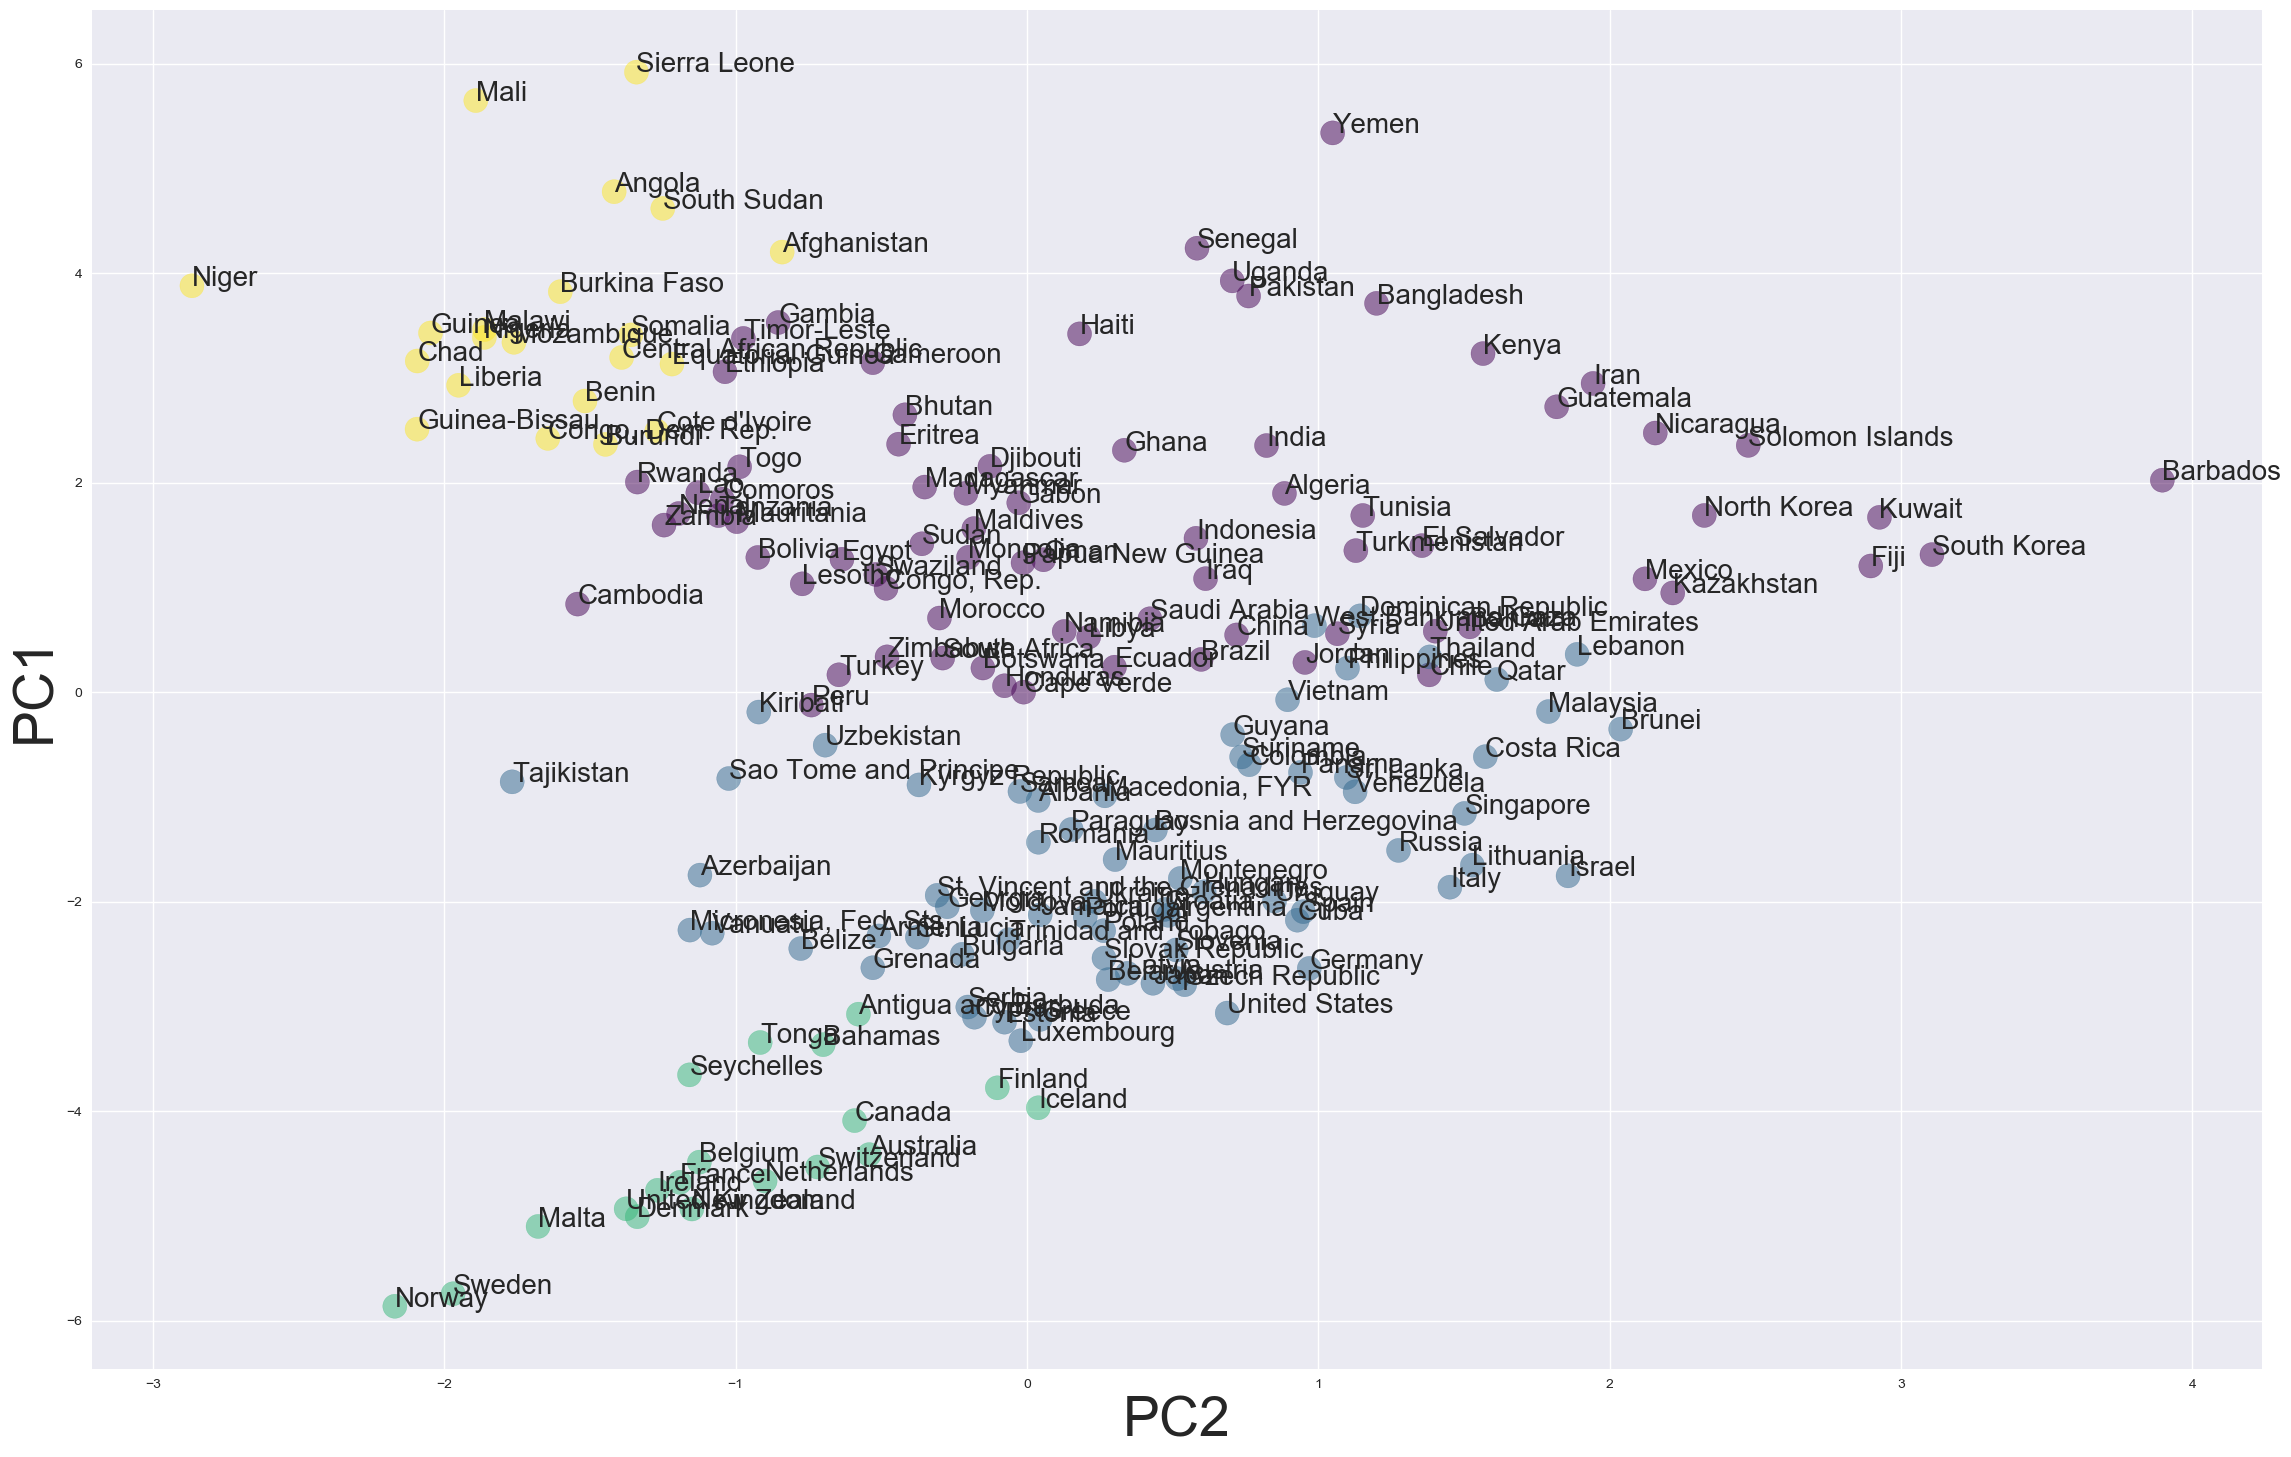

In [16]:
fig, ax = plt.subplots(figsize=(28, 18), dpi=100)
ax.scatter(child_mortality_PC_df['PC2'], child_mortality_PC_df['PC1'], alpha=0.5, s=300, c=child_mortality_PC_df['cluster'], cmap='viridis')
plt.xlabel('PC2',fontsize=40);plt.ylabel('PC1',fontsize=40);
for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1),fontsize=20)

## Investigating trends on the different clusters of countries: Average time series behaivour 

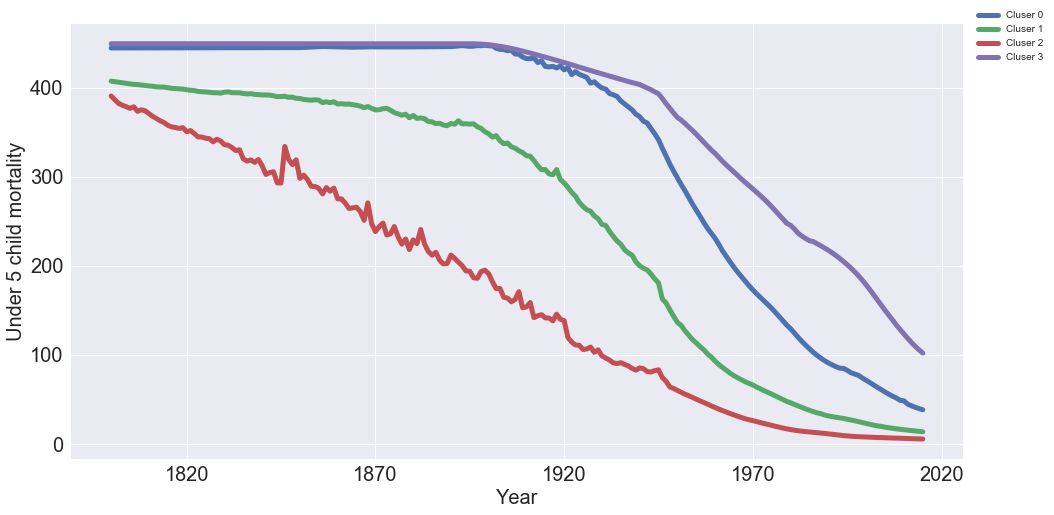

In [17]:
child_mortality_clustered = child_mortality_df.copy(deep=True)
child_mortality_clustered['cluster'] = pd.Series(clusters.labels_, index=child_mortality_clustered.index)
plot.timeseries_for_clusters_mean(child_mortality_clustered)

# Relating different clusters with the GDP per-capita indicator :

In [18]:
#loading the prepocessed 2015 GDP data into a pandas dataframe
file_path = 'data/gapminder_gdp_2015.csv'
gdp_2015_df = pd.read_csv(file_path, index_col = 0)
gdp_2015_df.index.names = ['country']
print 'years' ,gdp_2015_df.shape[1], ', countries',gdp_2015_df.shape[0]
gdp_2015_df.head()


years 1 , countries 201


,GDP 2015
country,
Afghanistan,1925.0
Albania,10620.0
Algeria,13434.0
Andorra,46577.0
Angola,7615.0


In [19]:
#mergin with clustered data
child_mortality_clustered_gdp = pd.merge(gdp_2015_df,child_mortality_clustered,how = 'outer', left_index = True, right_index=True)
child_mortality_clustered_gdp = child_mortality_clustered_gdp.dropna()
print 'years' ,child_mortality_clustered_gdp.shape[1], ', countries',child_mortality_clustered_gdp.shape[0]
child_mortality_clustered_gdp.head()

years 218 , countries 183


,GDP 2015,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,cluster
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1925.0,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1,3.0
Albania,10620.0,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0,1.0
Algeria,13434.0,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0,0.0
Angola,7615.0,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9,3.0
Antigua and Barbuda,21049.0,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,...,11.3,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1,2.0


# Countries and average GDP income for each cluster (ordered by income)

## Countries in cluster 3:

Average income for countries in cluster 3: 3411.05  US dollars per person per year


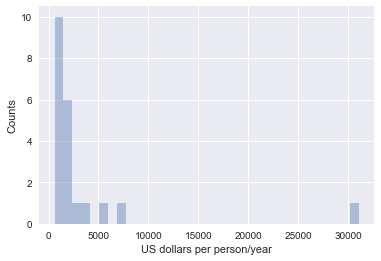

In [29]:
print 'Average income for countries in cluster 3:',round(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==3]['GDP 2015'].mean(),2), ' US dollars per person per year'
import seaborn as sb
ax = sb.distplot(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==3]['GDP 2015'],kde=False);
ax.set(xlabel='US dollars per person/year', ylabel='Counts')
plt.show()

Countries in cluster 3: ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Somalia', 'South Sudan']


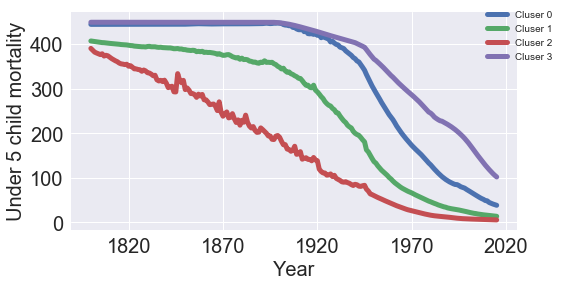

In [27]:
print 'Countries in cluster 3:', list(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==3].index)
plot.timeseries_for_clusters_mean(child_mortality_clustered,(8, 4))

## Countries in cluster 0:

Average income for countries in cluster 0: 11361.38  US dollars per person per year


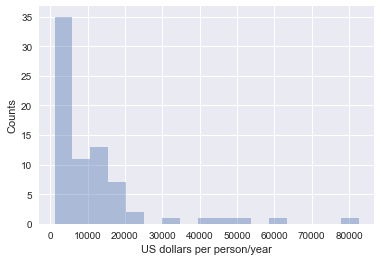

In [20]:
print 'Average income for countries in cluster 0:',round(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==0]['GDP 2015'].mean(),2), ' US dollars per person per year'
ax = sb.distplot(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==0]['GDP 2015'],kde=False);
ax.set(xlabel='US dollars per person/year', ylabel='Counts')
plt.show()

Countries in cluster 0: ['Algeria', 'Bahrain', 'Bangladesh', 'Barbados', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Cambodia', 'Cameroon', 'Cape Verde', 'Chile', 'China', 'Comoros', 'Congo, Rep.', 'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Lao', 'Lesotho', 'Libya', 'Madagascar', 'Maldives', 'Mauritania', 'Mexico', 'Mongolia', 'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'North Korea', 'Oman', 'Pakistan', 'Papua New Guinea', 'Peru', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Solomon Islands', 'South Africa', 'South Korea', 'Sudan', 'Swaziland', 'Syria', 'Tanzania', 'Timor-Leste', 'Togo', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'United Arab Emirates', 'Yemen', 'Zambia', 'Zimbabwe']


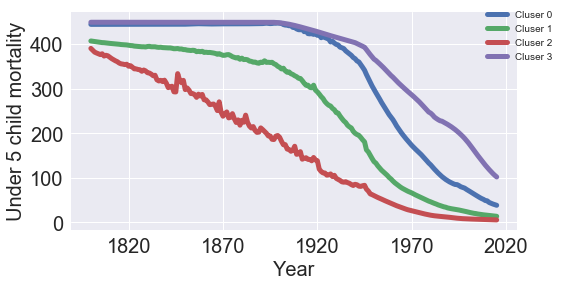

In [21]:
print 'Countries in cluster 0:', list(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==0].index)
plot.timeseries_for_clusters_mean(child_mortality_clustered,(8, 4))

## Countries in cluster 1:

Average income for countries in cluster 1: 21769.75  US dollars per person per year


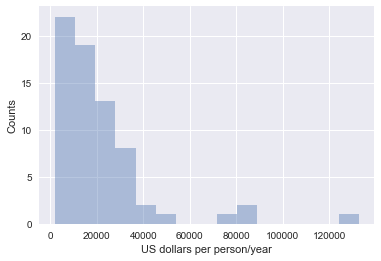

In [30]:
print 'Average income for countries in cluster 1:',round(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==1]['GDP 2015'].mean(),2), ' US dollars per person per year'
ax = sb.distplot(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==1]['GDP 2015'],kde=False);
ax.set(xlabel='US dollars per person/year', ylabel='Counts')
plt.show()

Countries in cluster 1: ['Albania', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belize', 'Bosnia and Herzegovina', 'Brunei', 'Bulgaria', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Estonia', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Hungary', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kiribati', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Samoa', 'Sao Tome and Principe', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sri Lanka', 'St. Lucia', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Trinidad and Tobago', 'Ukraine', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'West Bank and Gaza']


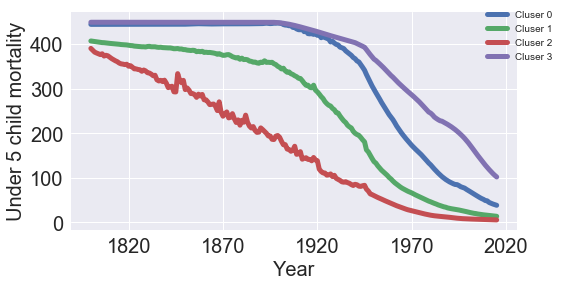

In [23]:
print 'Countries in cluster 1:', list(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==1].index)
plot.timeseries_for_clusters_mean(child_mortality_clustered,(8, 4))

## Countries in cluster 2:

Average income for countries in cluster 2: 38260.05  US dollars per person per year


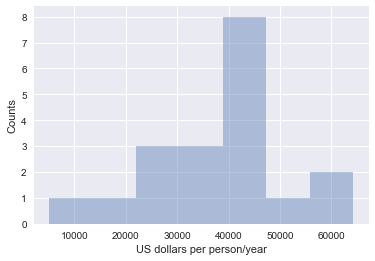

In [24]:
print 'Average income for countries in cluster 2:',round(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==2]['GDP 2015'].mean(),2), ' US dollars per person per year'
ax =sb.distplot(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==2]['GDP 2015'],kde=False);
ax.set(xlabel='US dollars per person/year', ylabel='Counts')
plt.show()

Countries in cluster 2: ['Antigua and Barbuda', 'Australia', 'Bahamas', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Iceland', 'Ireland', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Seychelles', 'Sweden', 'Switzerland', 'Tonga', 'United Kingdom']


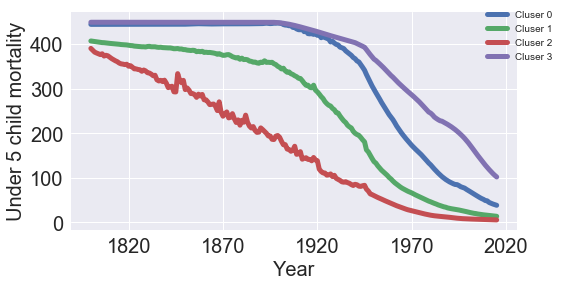

In [31]:
print 'Countries in cluster 2:', list(child_mortality_clustered_gdp[child_mortality_clustered_gdp['cluster']==2].index)
plot.timeseries_for_clusters_mean(child_mortality_clustered,(8, 4))

# Observations 

*  The time evolution of the Under-five mortality rate seems to be able to discrimnate (with some exceptions) between richest and poorest countries in the wold. 

* Some low income countries have done remarkable job of reducing the U5M metric the last decades, this is observed in the analysis when these country result in different clusters than the poorest countries in the world.  

* In middle income countries the time evolution of this data apears to separate them in different geografical regions where the trends in the data are similar.


# OUTLOOK

• In this example PCA gave us a better perspective of the Under-five mortality data providing a less complex view of the data. Furthermore the 2D visualisation of the main components and the clusters allowed us to understand the structures in our data.

• PCA can be used in many other scenarios:
   + Tackle the course of dimentionality 
   + Reduce size: In cases with large amounts data and we are going to use process-intensive algorithms on the data so we need to get rid of redundancy.  Apart from computational benefits, reducing the data’s dimension can also reduce the complexity of the hypothesis class considered and help avoid overfitting.